In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
hp = pd.read_csv("HousePricePrediction.csv")

In [16]:
hp.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [17]:
hp.shape

(2919, 13)

<AxesSubplot:>

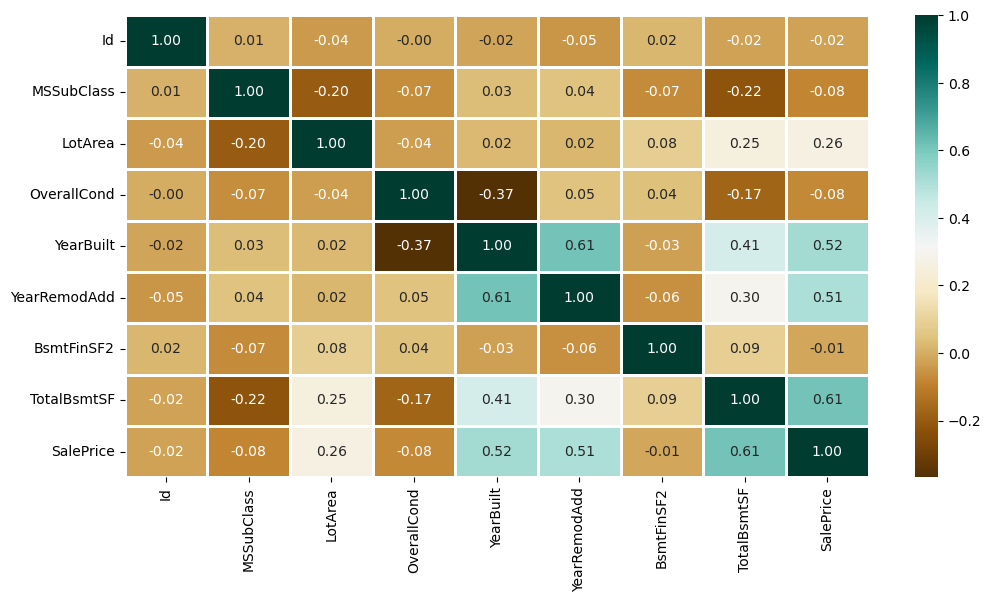

In [18]:
plt.figure(figsize=(12, 6))
sns.heatmap(hp.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [19]:
hp.drop(['Id'],
			axis=1,
			inplace=True)


In [20]:
hp['SalePrice'] = hp['SalePrice'].fillna(
hp['SalePrice'].mean())

In [21]:
new_dataset = hp.dropna()

In [22]:
from sklearn.preprocessing import OneHotEncoder
 
s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
      len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [24]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming you have defined object_cols and new_dataset

# Create OneHotEncoder object
OH_encoder = OneHotEncoder(sparse=False, drop='first')

# Fit and transform the categorical columns
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index

# Get the feature names
feature_names = OH_encoder.get_feature_names_out(input_features=object_cols)
OH_cols.columns = feature_names

# Concatenate the one-hot encoded columns with the original dataset
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)


I:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [25]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
	X, Y, train_size=0.8, test_size=0.2, random_state=0)


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error 
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)
 
print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.18742025463428355


Mean Absolute Percentage Error: 18.742025463428348


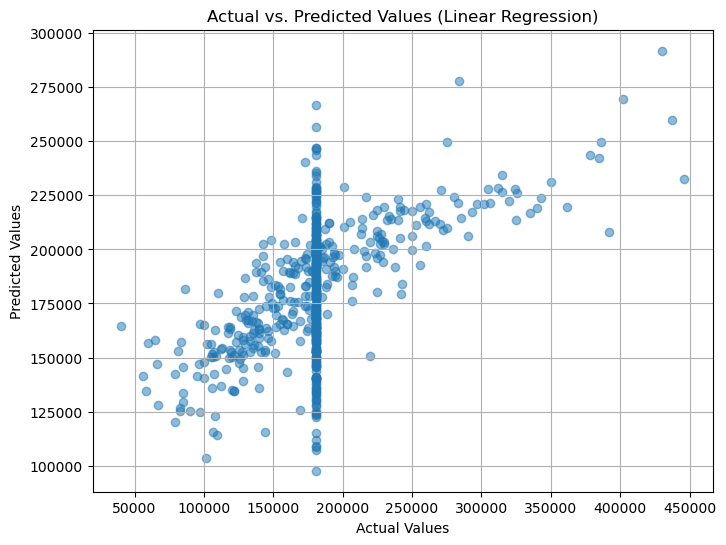

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Custom function to calculate mean absolute percentage error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Create and fit the Linear Regression model
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

# Calculate MAPE
mape = mean_absolute_percentage_error(Y_valid, Y_pred)
print("Mean Absolute Percentage Error:", mape)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(Y_valid, Y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Linear Regression)")
plt.grid(True)
plt.show()
